# Text Similarity

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/similarity](https://github.com/huseinzol05/Malaya/tree/master/example/similarity).
    
</div>

<div class="alert alert-info">

This module trained on both standard and local (included social media) language structures, so it is save to use for both.
    
</div>

In [1]:
%%time
import malaya

CPU times: user 5.55 s, sys: 1.09 s, total: 6.64 s
Wall time: 7.7 s


In [2]:
string1 = 'Pemuda mogok lapar desak kerajaan prihatin isu iklim'
string2 = 'Perbincangan isu pembalakan perlu babit kerajaan negeri'
string3 = 'kerajaan perlu kisah isu iklim, pemuda mogok lapar'
string4 = 'Kerajaan dicadang tubuh jawatankuasa khas tangani isu alam sekitar'

In [3]:
news1 = 'Tun Dr Mahathir Mohamad mengakui pembubaran Parlimen bagi membolehkan pilihan raya diadakan tidak sesuai dilaksanakan pada masa ini berikutan isu COVID-19'
tweet1 = 'DrM sembang pilihan raya tak boleh buat sebab COVID 19'

### Calculate similarity using doc2vec

We can use any word vector interface provided by Malaya to use doc2vec similarity interface.

Important parameters,
1. `aggregation`, aggregation function to accumulate word vectors. Default is `mean`.

    * ``'mean'`` - mean.
    * ``'min'`` - min.
    * ``'max'`` - max.
    * ``'sum'`` - sum.
    * ``'sqrt'`` - square root.
   
2. `similarity` distance function to calculate similarity. Default is `cosine`.

    * ``'cosine'`` - cosine similarity.
    * ``'euclidean'`` - euclidean similarity.
    * ``'manhattan'`` - manhattan similarity.

#### Using word2vec

I will use `load_news`, word2vec from wikipedia took a very long time. wikipedia much more accurate.

In [4]:
vocab_news, embedded_news = malaya.wordvector.load_news()
w2v = malaya.wordvector.load(embedded_news, vocab_news)
doc2vec = malaya.similarity.doc2vec(w2v)

downloading frozen /Users/huseinzolkepli/Malaya/wordvector/news vocab


4.00MB [00:01, 2.03MB/s]                          


downloading frozen /Users/huseinzolkepli/Malaya/wordvector/news model


191MB [01:01, 3.13MB/s]                          


#### predict for 2 strings

In [5]:
doc2vec.predict_proba([string1], [string2], aggregation = 'mean', soft = False)

array([0.899711], dtype=float32)

#### predict batch of strings

In [6]:
doc2vec.predict_proba([string1, string2], [string3, string4])

array([0.9215344, 0.853461 ], dtype=float32)

#### visualize heatmap

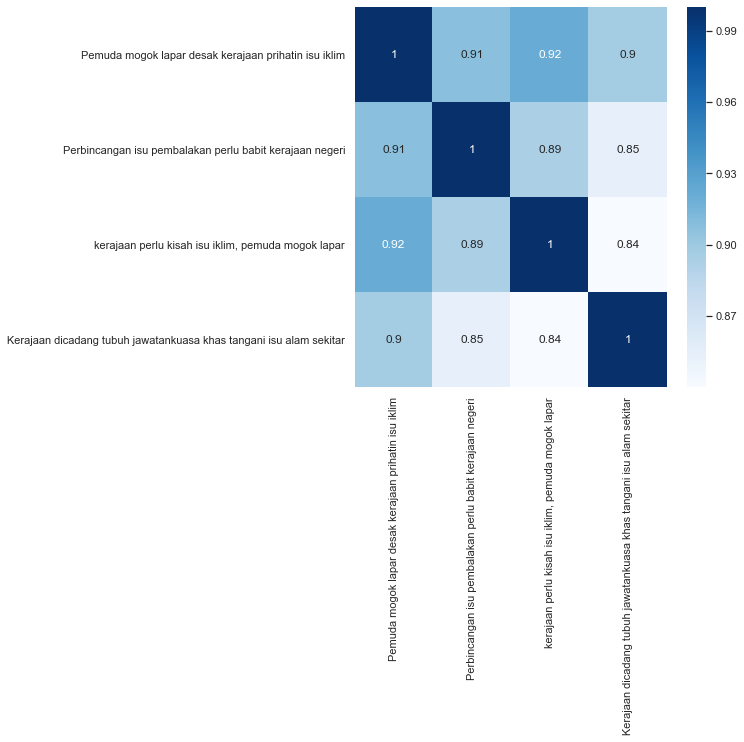

In [9]:
doc2vec.heatmap([string1, string2, string3, string4])

Different similarity function different percentage.

### Calculate similarity using deep encoder

We can use any encoder models provided by Malaya to use encoder similarity interface, example, BERT, XLNET, and skip-thought. Again, these encoder models not trained to do similarity classification, it just encode the strings into vector representation.

Important parameters,
   
1. `similarity` distance function to calculate similarity. Default is `cosine`.

    * ``'cosine'`` - cosine similarity.
    * ``'euclidean'`` - euclidean similarity.
    * ``'manhattan'`` - manhattan similarity.

#### using xlnet

In [11]:
xlnet = malaya.transformer.load(model = 'xlnet')
encoder = malaya.similarity.encoder(xlnet)

INFO:tensorflow:memory input None
INFO:tensorflow:Use float type <dtype: 'float32'>
INFO:tensorflow:Restoring parameters from /Users/huseinzolkepli/Malaya/xlnet-model/base/xlnet-base/model.ckpt


#### predict for 2 strings

In [12]:
encoder.predict_proba([string1], [string2])

array([0.8212017], dtype=float32)

#### predict batch of strings

In [13]:
encoder.predict_proba([string1, string2, news1, news1], [string3, string4, husein, string1])

array([0.8097714 , 0.78071797, 0.8244793 , 0.5807183 ], dtype=float32)

#### visualize heatmap

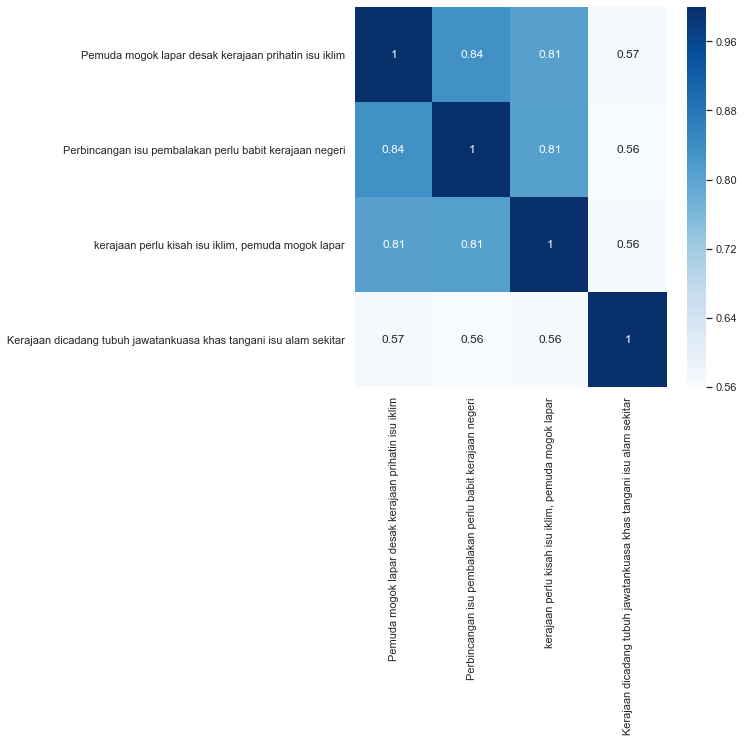

In [14]:
encoder.heatmap([string1, string2, string3, string4])

### List available Transformer models

In [4]:
malaya.similarity.available_transformer()

INFO:root:tested on 20% test set.


,Size (MB),Quantized Size (MB),Accuracy
bert,423.4,111.0,0.885
tiny-bert,56.6,15.0,0.873
albert,48.3,12.8,0.873
tiny-albert,21.9,6.0,0.824
xlnet,448.7,119.0,0.784
alxlnet,49.0,13.9,0.888


We trained on [Quora Question Pairs](https://github.com/huseinzol05/Malay-Dataset#quora), [translated SNLI](https://github.com/huseinzol05/Malay-Dataset#snli) and [translated MNLI](https://github.com/huseinzol05/Malay-Dataset#mnli)

Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/Accuracy.html#similarity

**You might want to use ALXLNET, a very small size, 49MB, but the accuracy is still on the top notch.**

### Load transformer model

In this example, I am going to load `alxlnet`, feel free to use any available models above.

In [8]:
model = malaya.similarity.transformer(model = 'alxlnet')

### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [5]:
quantized_model = malaya.similarity.transformer(model = 'alxlnet', quantized = True)

#### predict batch

```python
def predict_proba(self, strings_left: List[str], strings_right: List[str]):
    """
    calculate similarity for two different batch of texts.

    Parameters
    ----------
    string_left : List[str]
    string_right : List[str]

    Returns
    -------
    result : List[float]
    """
```

you need to give list of left strings, and list of right strings.

first left string will compare will first right string and so on.

similarity model only supported `predict_proba`.



In [17]:
model.predict_proba([string1, string2, news1, news1], [string3, string4, tweet1, string1])

array([0.9986665 , 0.04221377, 0.7916767 , 0.98151684], dtype=float32)

In [9]:
quantized_model.predict_proba([string1, string2, news1, news1], [string3, string4, tweet1, string1])

array([0.99855036, 0.06619915, 0.29902616, 0.98125756], dtype=float32)

#### visualize heatmap

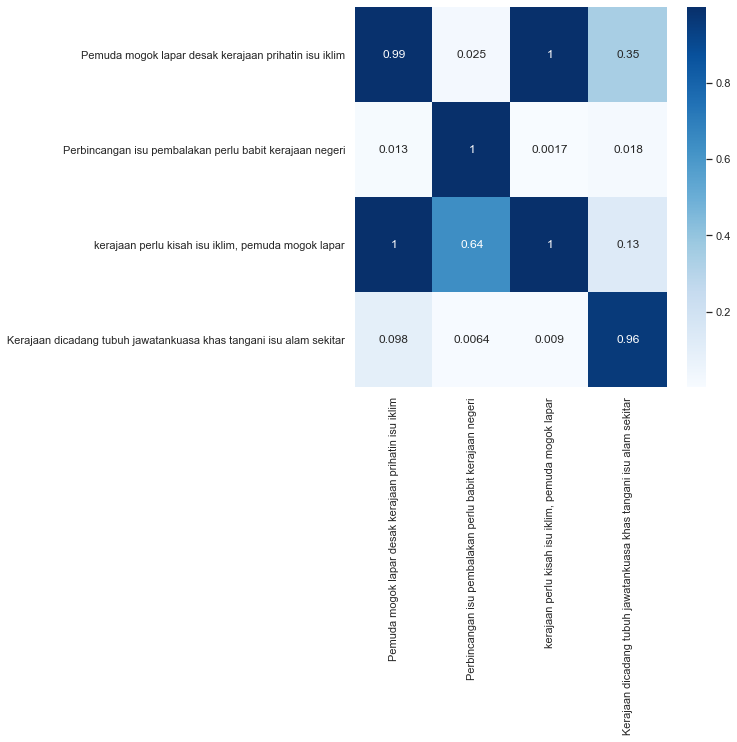

In [18]:
model.heatmap([string1, string2, string3, string4])

### Vectorize

Let say you want to visualize sentences in lower dimension, you can use `model.vectorize`,

```python
def vectorize(self, strings: List[str]):
    """
    Vectorize list of strings.

    Parameters
    ----------
    strings : List[str]

    Returns
    -------
    result: np.array
    """
```

In [6]:
texts = [string1, string2, string3, string4, news1, tweet1]
r = quantized_model.vectorize(texts)

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE().fit_transform(r)
tsne.shape

(6, 2)

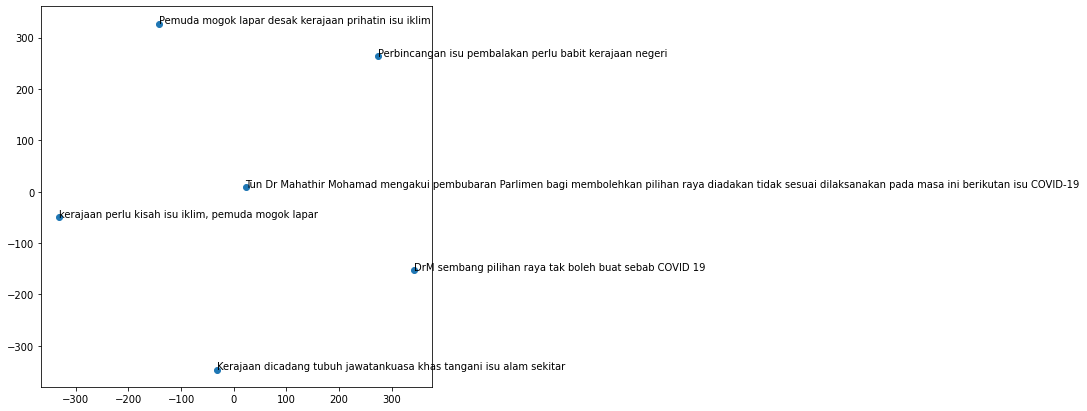

In [10]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = texts
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

### Stacking models

More information, you can read at https://malaya.readthedocs.io/en/latest/Stack.html

If you want to stack zero-shot classification models, you need to pass labels using keyword parameter,

```python
malaya.stack.predict_stack([model1, model2], List[str], strings_right = List[str])
```

We will passed `strings_right` as `**kwargs`.

In [4]:
alxlnet = malaya.similarity.transformer(model = 'alxlnet')
albert = malaya.similarity.transformer(model = 'albert')
tiny_bert = malaya.similarity.transformer(model = 'tiny-bert')





INFO:tensorflow:loading sentence piece model


In [5]:
malaya.stack.predict_stack([alxlnet, albert, tiny_bert], [string1, string2, news1, news1], 
                           strings_right = [string3, string4, tweet1, string1])

array([0.99745977, 0.07261255, 0.16457608, 0.03985301], dtype=float32)